In [82]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from subprocess import check_output
import random
import io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications import imagenet_utils
from keras.models import Sequential
from keras import layers
from keras import optimizers
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D

In [103]:
%matplotlib inline

def imshow(tit, image):
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()
    
    
DIR = './src/'

# 전이학습 Transfer learning

In [3]:
train_dir = './dataset/clean-dataset/train'
validation_dir = './dataset/clean-dataset/validation'
image_size = 224

In [4]:
vgg_conv = VGG16(weights= 'imagenet', include_top = False, input_shape = (image_size, image_size, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [5]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
model = Sequential()

model.add(vgg_conv)

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 27,561,795
Trainable params: 27,561,795
Non-trainable params: 0
_________________________________________________________________


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_batchsize = 20
val_batchsize = 10

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(image_size, image_size),
                                                   batch_size=train_batchsize, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(image_size, image_size),
                                                   batch_size=val_batchsize, class_mode='categorical', shuffle=False)

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=3, 
                              epochs=5, validation_data=validation_generator,
                             validation_steps=3, verbose=1)

Epoch 1/5
3/3 [==============================] - 23s 8s/step - loss: 2.2390 - accuracy: 0.3500 - val_loss: 0.9453 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 25s 8s/step - loss: 1.4363 - accuracy: 0.3333 - val_loss: 9.0143 - val_accuracy: 0.0000e+00
Epoch 3/5
3/3 [==============================] - 25s 8s/step - loss: 3.3282 - accuracy: 0.3167 - val_loss: 0.8719 - val_accuracy: 0.3000
Epoch 4/5
3/3 [==============================] - 25s 8s/step - loss: 1.9495 - accuracy: 0.1833 - val_loss: 0.7580 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 28s 9s/step - loss: 1.1800 - accuracy: 0.2000 - val_loss: 1.2187 - val_accuracy: 0.0000e+00


In [17]:
print(model.layers[0].name)
print(model.layers[0].trainable)

vgg16
True


In [18]:
for layer in model.layers:
    print(layer.name, layer.trainable)

vgg16 True
flatten True
dense True
dropout True
dense_1 True


In [20]:
for layer in vgg_conv.layers:
    print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [33]:
for layer in vgg_conv.layers:
    print(layer.trainable)
    layer.trainable = False
    
model.layers[0].trainable = False

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [34]:
for layer in model.layers:
    print(layer.name, layer.trainable)

vgg16 False
flatten_1 True
dense_2 True
dropout_1 True
dense_3 True


In [31]:
model = Sequential()

model.add(vgg_conv)

model.add(Flatten())
model.add(Dense(1052, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1052)              26393628  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1052)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3159      
Total params: 41,111,475
Trainable params: 26,396,787
Non-trainable params: 14,714,688
_________________________________________________________________


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [38]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=3, 
                              epochs=5, validation_data=validation_generator,
                             validation_steps=3, verbose=1)

Epoch 1/5
3/3 [==============================] - 8s 3s/step - loss: 1.1192 - accuracy: 0.2667 - val_loss: 0.9365 - val_accuracy: 1.0000
Epoch 2/5
3/3 [==============================] - 8s 3s/step - loss: 1.1062 - accuracy: 0.3500 - val_loss: 0.8432 - val_accuracy: 1.0000
Epoch 3/5
3/3 [==============================] - 8s 3s/step - loss: 1.1449 - accuracy: 0.2500 - val_loss: 1.0117 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 10s 3s/step - loss: 1.1186 - accuracy: 0.2833 - val_loss: 1.1789 - val_accuracy: 0.0000e+00
Epoch 5/5
3/3 [==============================] - 10s 3s/step - loss: 1.1012 - accuracy: 0.3667 - val_loss: 1.2613 - val_accuracy: 0.0000e+00


In [41]:
model.layers[0].trainable = True

for layer in vgg_conv.layers:
    layer.trainable = True
    
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
    
for layer in vgg_conv.layers:
    print(layer.trainable)
    
vgg_conv.summary()

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________

In [ ]:
#1: 네트웍 구조만 사용 + 전체 재 학습
model = Sequential()
model.add(vgg_conv)
model.add(Flatten())
model.add(Dense(1025, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

#2 freezing: 네트웍 구조 사용, 필터 레이어의 가중치는 재사용
for l in vgg_conv.layers:
    l.trainable = False
    # 2 개의 네트웍을 분리해서 고속으로 학습 가능
    
#3 fine tunning: 네트웍 구조 사용, 일부 필터(상위) 레이어의 가중치는 재사용
for l in vgg_conv.layers[:-4]:
    l.trainable = False

# Food 11 사진 분류
- Bread
- Dairy product
- Dessert
- Egg
- Fried food
- Meat
- Noodles/Pasta
- Rice
- Seafood
- Soup
- Vegetable/Fruit

In [42]:
import os
train=["./dataset/food-11/training/" + img for img in os.listdir("./dataset/food-11/training/")]
val = ["./dataset/food-11/validation/" + img for img in os.listdir("./dataset/food-11/validation")]
test = ["./dataset/food-11/evaluation/" + img for img in os.listdir("./dataset/food-11/evaluation")]

In [44]:
print(len(train))
print(len(test))

9866
3347


In [45]:
img = train[0]
print(img)

./dataset/food-11/training/0_0.jpg


In [47]:
v = img.split('/')
print(v)
v2 = v[-1]
print(v2)
print(v2.split('_'))

['.', 'dataset', 'food-11', 'training', '0_0.jpg']
0_0.jpg
['0', '0.jpg']


In [49]:
train_y = [int(img.split("/")[-1].split("_")[0]) for img in train]
val_y = [int(img.split("/")[-1].split("_")[0]) for img in val]
test_y = [int(img.split("/")[-1].split("_")[0]) for img in test]

In [54]:
num_classes = 11
y_train = to_categorical(train_y, num_classes)
y_val = to_categorical(val_y, num_classes)
y_test = to_categorical(test_y, num_classes)

[994, 429, 1500, 986, 848, 1325, 440, 280, 855, 1500, 709]


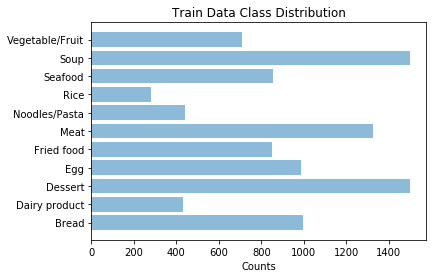

In [55]:
food_classes = ('Bread', 'Dairy product','Dessert', 'Egg', 'Fried food', 'Meat','Noodles/Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable/Fruit')

y_pos = np.arange(len(food_classes))
counts = [train_y.count(i) for i in range(0,11)]
print(counts)

plt.barh(y_pos, counts, align = 'center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Train Data Class Distribution')

plt.show()

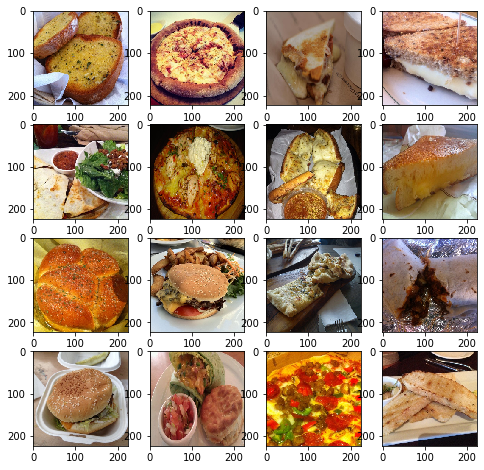

In [56]:
plt.figure(figsize=(8,8))
k=0
for i in range(0,4):
    for j in range(0,4):
        image = load_img(train[k], target_size=(224,224))
        plt.subplot2grid((4,4),(i,j))
        plt.imshow(image)
        k = k+1
plt.show()

In [63]:
def create_features(dataset):
    x_scratch = []
    i = 0
    lll = len(dataset)
    for imagePath in dataset:
        image = load_img(imagePath, target_size=(224,224))
        image = img_to_array(image)
        image = np.expand_dims(image, axis = 0)
        image = imagenet_utils.preprocess_input(image)
        x_scratch.append(image)
        if i % 500 == 0:
            print(i, lll)
        i += 1
    x = np.vstack(x_scratch)
    return x

In [64]:
train_x = create_features(train)

0 9866
500 9866
1000 9866
1500 9866
2000 9866
2500 9866
3000 9866
3500 9866
4000 9866
4500 9866
5000 9866
5500 9866
6000 9866
6500 9866
7000 9866
7500 9866
8000 9866
8500 9866
9000 9866
9500 9866


In [66]:
val_x = create_features(val)

0 3430
500 3430
1000 3430
1500 3430
2000 3430
2500 3430
3000 3430


In [67]:
test_x = create_features(test)

0 3347
500 3347
1000 3347
1500 3347
2000 3347
2500 3347
3000 3347


In [68]:
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(9866, 224, 224, 3)
(3430, 224, 224, 3)
(3347, 224, 224, 3)


In [70]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

model_scratch = Sequential()
model_scratch.add(Conv2D(32, (3, 3), activation='relu',input_shape = train_x.shape[1:]))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(64, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(64, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(128, (3, 3), activation='relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(GlobalAveragePooling2D())
model_scratch.add(Dense(64, activation='relu'))
model_scratch.add(Dense(11, activation='softmax'))
model_scratch.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)      

In [72]:
model_scratch.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history = model_scratch.fit(train_x, y_train, 
          batch_size=32, epochs=1, 
          verbose=1, shuffle=True)

309/309 [==============================] - 366s 1s/step - loss: 2.0017 - accuracy: 0.2974


In [73]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [74]:
%%time
train_features = vgg16.predict(train_x, batch_size=32)    

Wall time: 23min 11s


In [75]:
%%time
test_features = vgg16.predict(test_x, batch_size=32)    

Wall time: 7min 54s


In [ ]:
%%time
# val_features = vgg16.predict(val_x, batch_size=32)

In [80]:
model_transfer = Sequential()
model_transfer.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model_transfer.add(Dropout(0.2))
model_transfer.add(Dense(100, activation = 'relu'))
model_transfer.add(Dense(11, activation='softmax'))
model_transfer.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_7 (Dense)              (None, 11)                1111      
Total params: 52,411
Trainable params: 52,411
Non-trainable params: 0
_________________________________________________________________


In [81]:
model_transfer.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = model_transfer.fit(train_features, y_train, batch_size=32, epochs=40,
                    verbose=1, shuffle=True)

Epoch 1/40
309/309 [==============================] - 1s 4ms/step - loss: 1.8187 - accuracy: 0.5580
Epoch 2/40
309/309 [==============================] - 1s 3ms/step - loss: 0.8674 - accuracy: 0.7265
Epoch 3/40
309/309 [==============================] - 1s 3ms/step - loss: 0.7178 - accuracy: 0.7662
Epoch 4/40
309/309 [==============================] - 1s 3ms/step - loss: 0.6357 - accuracy: 0.7904
Epoch 5/40
309/309 [==============================] - 1s 3ms/step - loss: 0.5993 - accuracy: 0.8025
Epoch 6/40
309/309 [==============================] - 1s 3ms/step - loss: 0.5397 - accuracy: 0.8212
Epoch 7/40
309/309 [==============================] - 1s 3ms/step - loss: 0.5133 - accuracy: 0.8306
Epoch 8/40
309/309 [==============================] - 1s 3ms/step - loss: 0.4863 - accuracy: 0.8333
Epoch 9/40
309/309 [==============================] - 1s 3ms/step - loss: 0.4686 - accuracy: 0.8387
Epoch 10/40
309/309 [==============================] - 1s 3ms/step - loss: 0.4512 - accuracy: 0.8443

In [83]:
print(test_features.shape)

preds = np.argmax(model_transfer.predict(test_features), axis=1)
accuracy_score(test_y, preds)

(3347, 7, 7, 512)


0.8664475649835673

In [84]:
import pickle
with open('train_features.bin', 'wb') as f:   pickle.dump(train_features, f)
with open('test_features.bin', 'wb') as f:   pickle.dump(test_features, f)

In [85]:
with open("val_features.bin","rb") as fr:
    val_features = pickle.load(fr)

In [86]:
model_transfer.save("food11_transfer.h5")

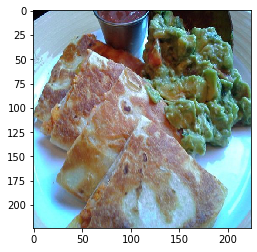

In [90]:
image = load_img('./src/food_0.jpg', target_size=(224, 224))
plt.imshow(image)

In [91]:
%%time
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)
features = vgg16.predict(image)  
r = np.argmax(model_transfer.predict(features), axis=1)

Wall time: 173 ms


In [92]:
print(food_classes[r[0]])

Bread


In [93]:
for layer in vgg16.layers[:-9]:
    layer.trainable = False

In [94]:
model_transfer_half = Sequential()
model_transfer_half.add(vgg16)
model_transfer_half.add(GlobalAveragePooling2D())
model_transfer_half.add(Dropout(0.2))
model_transfer_half.add(Dense(100, activation = 'relu'))
model_transfer_half.add(Dense(11, activation='softmax'))
model_transfer_half.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               51300     
_________________________________________________________________
dense_9 (Dense)              (None, 11)                1111      
Total params: 14,767,099
Trainable params: 13,031,611
Non-trainable params: 1,735,488
_________________________________________________________________


In [ ]:
# model_transfer_half.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
# history = model_transfer_half.fit(train_x, y_train, batch_size=32, epochs=10,verbose=1, shuffle=True)

# YOLO

In [96]:
confThreshold = 0.5  #Confidence threshold
nmsThreshold = 0.4   #Non-maximum suppression threshold
inpWidth = 416       #Width of network's input image
inpHeight = 416      #Height of network's input image

# Load names of classes
classesFile = "coco.names"
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
print(classes)
print(len(classes))
# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "yolov3.cfg"
modelWeights = "yolov3.weights"

net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [112]:
# Get the names of the output layers
def getOutputsNames(net):

    layersNames = net.getLayerNames() # yolo 네트워크에서 사용하는 모든 레이어들 
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]  #3개의 yolo layer

# Draw the predicted bounding box
def drawPred(i, classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv2.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    
    label = '%.2f' % conf
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%d  %s:%s' % (i, classes[classId], label)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
#     cv2.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), (255, 255, 255), cv2.FILLED)
#     cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)

# Remove the bounding boxes with low confidence using non-maxima suppression
def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    for out in outs:           # 모든 출력층에 대해서 계산
        for detection in out:
            scores = detection[5:]      
            classId = np.argmax(scores)      # 최대 확률값 가져온다.
            confidence = scores[classId]
            if confidence >  0.0:   # 객체확률
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    # nms가 너무 낮으면  겹치는 객체를 감지하지 못함
    # nms가 너무 크면 같은 객체에 대해서 box 많이 사용, 합칠지 말지 결정
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(i, classIds[i], confidences[i], left, top, left + width, top + height)

In [109]:
cap = cv2.VideoCapture(DIR + 'cars.jpg')

hasFrame, frame = cap.read()
blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], True, crop=False)

net.setInput(blob)

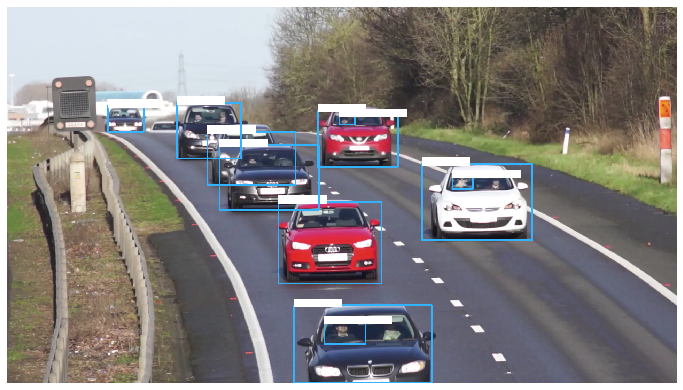

In [110]:
outs = net.forward(getOutputsNames(net)) # predict과 같은 기능
postprocess(frame, outs)

imshow("", frame)

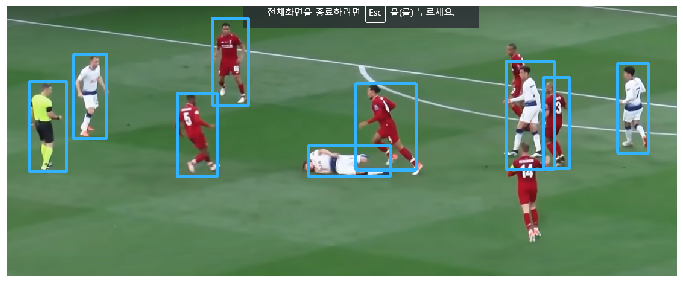

In [113]:
frame = cv2.imread('./vision/hogtest.png')
blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], True, crop=False)

net.setInput(blob)

outs = net.forward(getOutputsNames(net))
postprocess(frame, outs)

imshow("", frame)